In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import so_decadal_variability.calc as socalc
plt.rcParams['pcolor.shading']='auto'

## Observational data; evaluated on flux grid

In [21]:
fluxname = 'merra2'
oceanname = 'en4'
density = 'sigma0'
dg = 0.1
localdir = '../../data/processed/'+fluxname+'_'+oceanname+'/'
filename = 'G.'+density+'.'+str(dg)+'.*.nc'
G = xr.open_mfdataset(localdir+filename)

(1026.0, 1028.5)

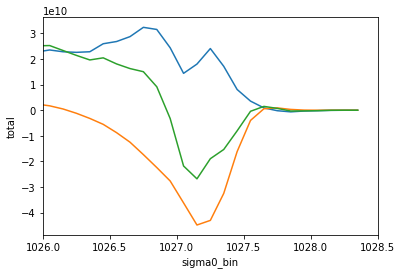

In [22]:
G['heat'].mean('time').plot()
G['fw'].mean('time').plot()
G['total'].mean('time').plot()
plt.gca().set_xlim(1026,1028.5)

## Observational dataset (no ECCO)

In [6]:
params = {}
params['linestyle'] = {'erai':'--','era5':':','jra55':'-','merra2':'-.'}
params['color'] = {'total':'k','heat':'tab:red','fw':'tab:blue'}

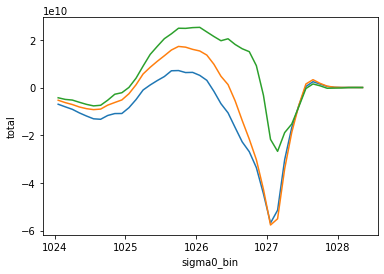

In [20]:
Gocean = {}
# Load observational data
fluxnames=['erai','era5','merra2']
oceanname='en4'
density = 'sigma0'
dg = 0.1
for fluxname in fluxnames:
    Gocean[fluxname+'_'+oceanname] = xr.open_mfdataset('../../data/processed/'+fluxname+'_'+oceanname+'/G.'+density+'.'+str(dg)+'.*.nc')
    Gocean[fluxname+'_'+oceanname]['total'].mean('time').plot()

In [4]:
# Calculate transformation
dG = {}
upwelling = {}
for fluxname in fluxnames:
    dG[fluxname] = xr.Dataset()
    upwelling[fluxname] = xr.Dataset()
    # Calculate formation for each component
    for var in G[fluxname].data_vars:
        dG[fluxname][var] = -1*G[fluxname][var].diff('gamman_bin')
        condition = socalc._annual(dG[fluxname][var])<0
        upwelling[fluxname][var] = socalc._annualanom(
            dG[fluxname][var]).where(condition,0).sel(gamman_bin=slice(27.2,9999)).sum('gamman_bin')

# condition = (socalc._annual(-1*ecco['bin_FORC'].diff('gamma_n'))<0)
# upwelling = div.where(condition,0).sel(gamma_n=slice(26.9,9999)).sum('gamma_n')
# upwelling_anom = upwelling-upwelling.mean('time')

/home/aos/graemem/miniconda3/envs/so_decadal_variability/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/aos/graemem/miniconda3/envs/so_decadal_variability/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/aos/graemem/miniconda3/envs/so_decadal_variability/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/aos/graemem/miniconda3/envs/so_decadal_variability/lib/python3.7/site-packages/numpy/core/fromnumeric.py:87: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/home/aos/graemem/miniconda3/envs/so_decadal_variability/lib/python3.7/site-packages/numpy/core/

#### Distribution plot of WMT

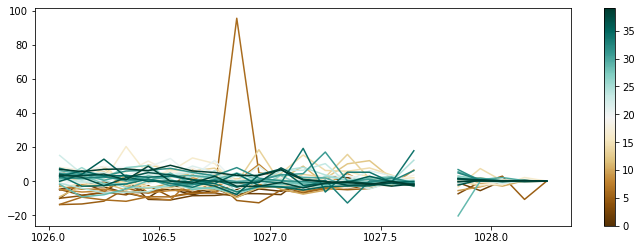

In [5]:
# transformation
fluxnname = 'era5'
start = 0
stop = 1
N = len(socalc._annual(G[fluxname]['time']))
colors = [ cm.BrBG(x) for x in np.linspace(start, stop, N) ]
sm = plt.cm.ScalarMappable(cmap=cm.BrBG, norm=plt.Normalize(vmin=0, vmax=N))

x = G[fluxname]['gamman_bin']
fig, ax = plt.subplots(figsize = (12,4))
for t in range(N):
    ax.plot(x,socalc._annualanom(G[fluxname]['total']).isel(time=t),color=colors[t])
cbar = plt.colorbar(sm)

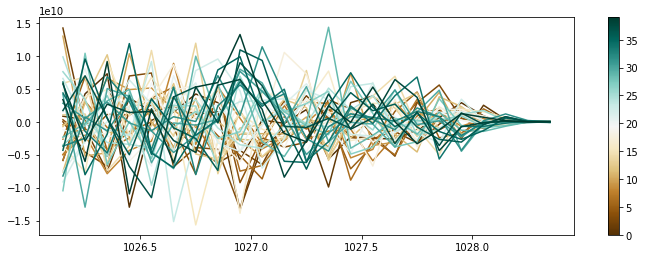

In [12]:
# formation
fluxnname = 'era5'
start = 0
stop = 1
N = len(socalc._annual(dG[fluxname]['time']))
colors = [ cm.BrBG(x) for x in np.linspace(start, stop, N) ]
sm = plt.cm.ScalarMappable(cmap=cm.BrBG, norm=plt.Normalize(vmin=0, vmax=N))

x = dG[fluxname]['gamman_bin']
fig, ax = plt.subplots(figsize = (12,4))
for t in range(N):
    ax.plot(x,socalc._annualanom(dG[fluxname]['total']).isel(time=t),color=colors[t])
cbar = plt.colorbar(sm)

KeyError: 'erai'

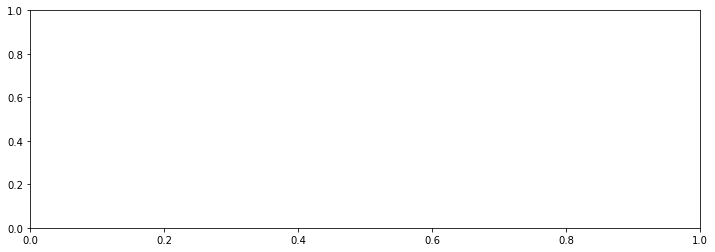

In [14]:
## Time mean Transformation
fig,ax = plt.subplots(figsize=(12,4))
im={}
for fluxname in fluxnames:
    x = G[fluxname]['gamman_bin']-1000
    for var in G[fluxname].data_vars:
        im[fluxname+var]=ax.plot(x,G[fluxname][var].mean('time'),
                        color=params['color'][var],
                        linestyle=params['linestyle'][fluxname],label=fluxname+', '+var)
handles,labels=ax.get_legend_handles_labels()
ax.set_xlim(26.2,28.4)
ax.legend(handles=[handles[2],
                  handles[5],
                  handles[8],
                  handles[11],
                  handles[6],
                  handles[7],
                  handles[8]],
          labels=['erai','era5','jra55','merra2',
                 'heat','freshwater','total'])


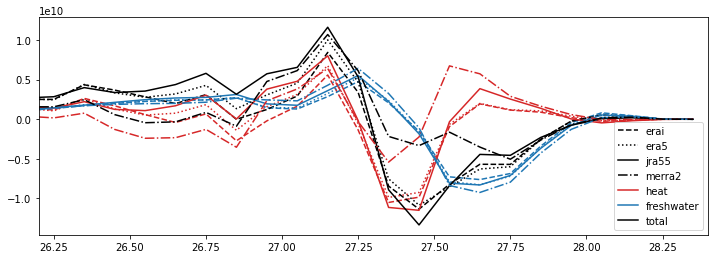

In [53]:
## Time mean Formation
fig,ax = plt.subplots(figsize=(12,4))
im={}
for fluxname in fluxnames:
    x = dG[fluxname]['gamman_bin']-1000
    for var in dG[fluxname].data_vars:
        im[fluxname+var]=ax.plot(x,dG[fluxname][var].mean('time'),
                        color=params['color'][var],
                        linestyle=params['linestyle'][fluxname],label=fluxname+', '+var)
handles,labels=ax.get_legend_handles_labels()
ax.set_xlim(26.2,28.4)
ax.legend(handles=[handles[2],
                  handles[5],
                  handles[8],
                  handles[11],
                  handles[6],
                  handles[7],
                  handles[8]],
          labels=['erai','era5','jra55','merra2',
                 'heat','freshwater','total'])


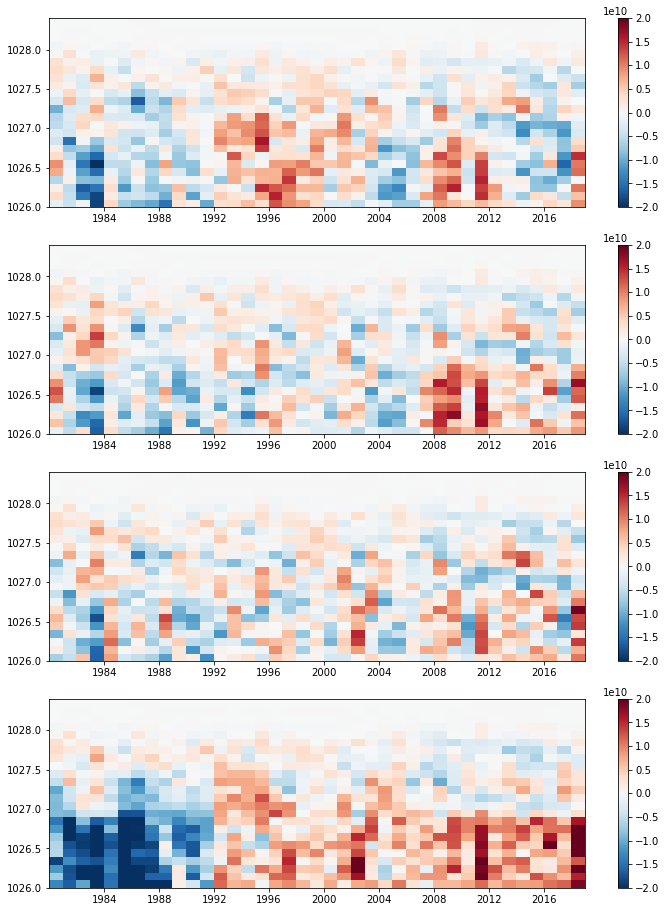

In [33]:
## Annual anomalies : TRANSFORMATION
n = len(fluxnames)
fig,ax = plt.subplots(figsize=(12,n*4),nrows=n)
count=0
for i, fluxname in enumerate(fluxnames):
    x = socalc._annual(G[fluxname]['time'])
    y = G[fluxname]['gamman_bin']
    axnow = ax[i]
    im = axnow.pcolormesh(x,y,
                          socalc._annualanom(G[fluxname]['total']).transpose(),
                          vmin=-2E10,vmax=2E10,cmap='RdBu_r')
    plt.colorbar(im,ax=axnow)

(3652.0, 17897.0)

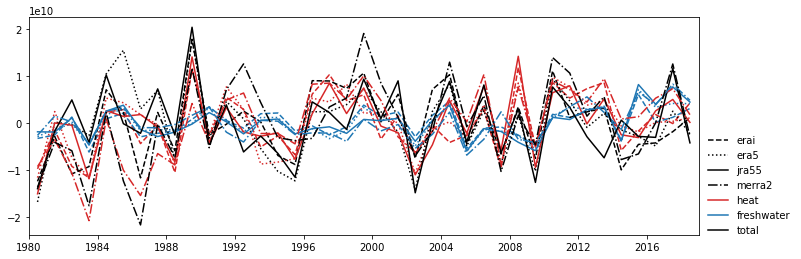

In [75]:
## Annual anomalies : UPWELLING
n = len(fluxnames)
fig,ax = plt.subplots(figsize=(12,4))
for fluxname in fluxnames:
    x = upwelling[fluxname]['time']
    for var in G[fluxname].data_vars:
        upwelling_anom = (upwelling[fluxname][var]-upwelling[fluxname][var].mean('time'))
        im = ax.plot(x,upwelling_anom,
                     linestyle=params['linestyle'][fluxname],
                     color=params['color'][var],
                     label=fluxname+', '+var)
handles,labels=ax.get_legend_handles_labels()
ax.legend(handles=[handles[2],
                  handles[5],
                  handles[8],
                  handles[11],
                  handles[6],
                  handles[7],
                  handles[8]],
          labels=['erai','era5','jra55','merra2',
                 'heat','freshwater','total'],
         frameon=False, bbox_to_anchor=(1.15,0.5))
ax.set_xlim('1980','2019')

(3652.0, 17897.0)

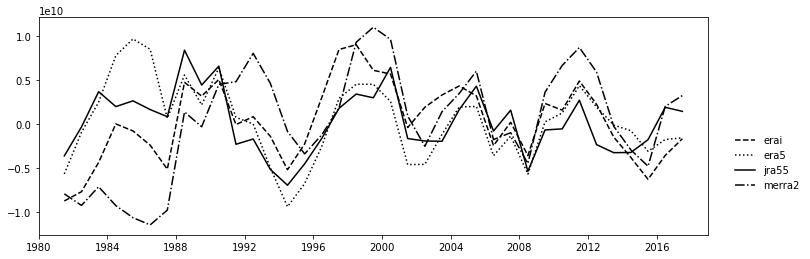

In [81]:
## Annual anomalies : UPWELLING
n = len(fluxnames)
fig,ax = plt.subplots(figsize=(12,4))
for fluxname in fluxnames:
    x = upwelling[fluxname]['time']
    var='total'
    upwelling_anom = (upwelling[fluxname][var]-upwelling[fluxname][var].mean('time')).rolling(time=3,center=True).mean()
    im = ax.plot(x,upwelling_anom,
                 linestyle=params['linestyle'][fluxname],
                 color=params['color'][var],
                 label=fluxname)
handles,labels=ax.get_legend_handles_labels()
ax.legend(frameon=False, bbox_to_anchor=(1.15,0.5))
ax.set_xlim('1980','2019')

## Comparison to ECCO data

In [83]:
# Load ecco data
rootdir = '../'
localdir = 'data/processed/ECCO/'
filename = 'binned_vol_budget_month_dGamman_0.1.nc'
ecco = xr.open_dataset(rootdir+localdir+filename)
# Make some naming adjustments
ecco['G'] = ecco['bin_FORC'].copy()
ecco['dMdt_from_tend'] = ecco['bin_TEN'].copy()
# Load erai-en4 data
localdir = 'data/processed/en4/'
filename = 'dMdt_0.1.nc'
en4 = xr.open_dataset(rootdir+localdir+filename).transpose()
# Shift the coordinates to correspsond with ECCO
en4 = en4.rename({'gamman_bin':'gamma_n'}).assign_coords({'gamma_n':ecco['gamma_n'][:-2]})

In [84]:
# Construct M for ECCO as it is in ERAi
M_on_gamma_cumsum = xr.concat([xr.zeros_like(ecco['bin_vol'].isel({'gamma_n':0})),
                               ecco['bin_vol'].cumsum('gamma_n')],dim='gamma_n')
# We wish to have the total mass for the volume with temperature greater than that contour,
# So take away the total sum from the cumulative sum to reverse the direction
M_reverse = (ecco['bin_vol'].sum('gamma_n')-M_on_gamma_cumsum)
# Now we can get rid of the boundary contours, which were there to ensure that all
# of the volume wass captures, and we assign the coordinates to match with G
M = M_reverse.isel(gamma_n=slice(1,None)).assign_coords({'gamma_n':ecco['gamma_n']})
# Calculate the derivative with respect to time
dMdt = M.diff('time')/(M['time'].diff('time').astype('float')*1E-9)
ecco['dMdt_from_M'] = dMdt.transpose()

In [85]:
# Define the time-period for comparison
start = '1994-01-01'
end = '2016-12-31'
months = pd.date_range(start,end,freq='1M')
years = pd.date_range(start,end,freq='1Y')
gs = ecco['gamma_n'].sel({'gamma_n':slice(26.1,28.4)})
select = {'time':slice(start,end),'gamma_n':gs}

### Time-mean

In [86]:
erai['G'].sel(select).mean('time').plot(color='tab:blue')
erai['dMdt'].sel(select).mean('time').plot(color='tab:blue',linestyle='--')
ecco['G'].sel(select).mean('time').plot(color='tab:orange')
ecco['dMdt_from_M'].sel(select).mean('time').plot(color='tab:orange',linestyle='--')

NameError: name 'erai' is not defined

### Each year annual average

In [87]:
def _annual(da):
    annual = da.coarsen(time=12,boundary='trim').mean()
    return annual
def _annualanom(da):
    annual = da.coarsen(time=12,boundary='trim').mean()
    mean = da.mean('time')*xr.ones_like(annual)
    annualanom = annual-mean
    return annualanom
def _anom(da):
    mean = da.mean('time')*xr.ones_like(da)
    anom = da-mean
    return anom

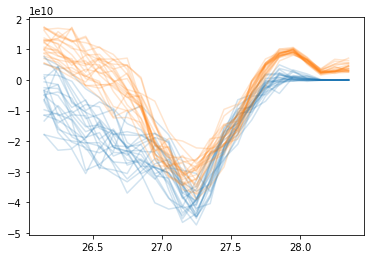

In [32]:
plt.plot(gs,_annual(erai['G'].sel(select)),color='tab:blue',alpha=0.2);
plt.plot(gs,_annual(ecco['G'].sel(select)),color='tab:orange',alpha=0.2);

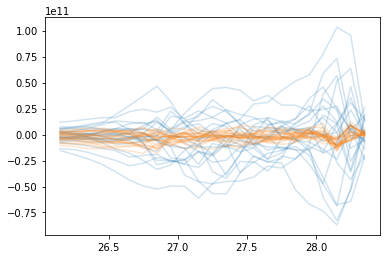

In [89]:
plt.plot(gs,_annual(en4['dMdt'].sel(select)),color='tab:blue',alpha=0.2);
plt.plot(gs,_annual(ecco['dMdt_from_M'].sel(select)),color='tab:orange',alpha=0.2);

### Compare ways of calculating dMdt
From volume itself and from volume tendency

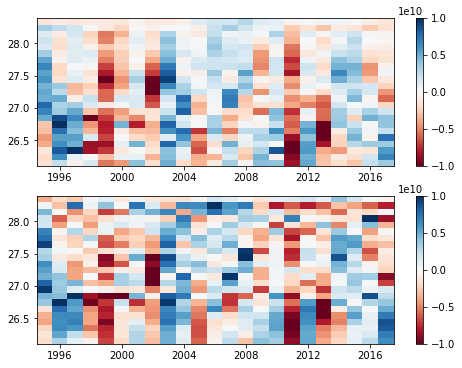

In [36]:
clims = [-1E10,1E10]
fig,ax = plt.subplots(figsize=(8,6),nrows=2)
im = ax[0].pcolormesh(years,gs,
                      _annualanom(ecco['dMdt_from_tend'].sel(select)),
                      vmin = clims[0],vmax = clims[1], cmap='RdBu')
plt.colorbar(im,ax=ax[0])
im = ax[1].pcolormesh(years,gs,
                      _annualanom(ecco['dMdt_from_M'].sel(select)),
                      vmin = clims[0],vmax = clims[1], cmap='RdBu')
plt.colorbar(im,ax=ax[1])

### Colormeshes of dMdt

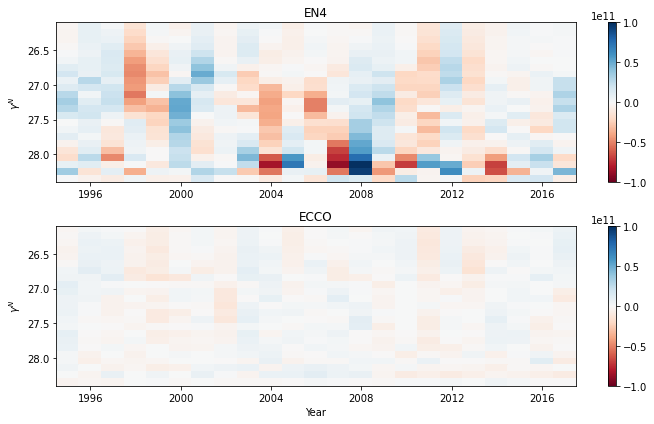

In [99]:
clims = [-1E11,1E11]
fig,ax = plt.subplots(figsize=(10,6),nrows=2)
im = ax[0].pcolormesh(years,gs,
                      _annualanom(en4['dMdt'].sel(select)),
                      vmin = clims[0],vmax = clims[1], cmap='RdBu')
ax[0].invert_yaxis()
ax[0].set_ylabel('$\gamma^N$')
ax[0].set_title('EN4')
plt.colorbar(im,ax=ax[0])
im = ax[1].pcolormesh(years,gs,
                      _annualanom(ecco['dMdt_from_M'].sel(select)),
                      vmin = clims[0],vmax = clims[1], cmap='RdBu')
ax[1].invert_yaxis()
ax[1].set_ylabel('$\gamma^N$')
ax[1].set_xlabel('Year')
ax[1].set_title('ECCO')
plt.colorbar(im,ax=ax[1])
plt.tight_layout()

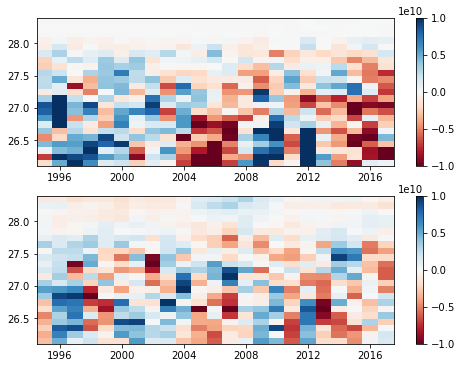

In [47]:
clims = [-1E10,1E10]
fig,ax = plt.subplots(figsize=(8,6),nrows=2)
im = ax[0].pcolormesh(years,gs,
                      _annualanom(erai['G'].sel(select)),
                      vmin = clims[0],vmax = clims[1], cmap='RdBu')
plt.colorbar(im,ax=ax[0])
im = ax[1].pcolormesh(years,gs,
                      _annualanom(ecco['G'].sel(select)),
                      vmin = clims[0],vmax = clims[1], cmap='RdBu')
plt.colorbar(im,ax=ax[1])

### Take a closer look at the volume

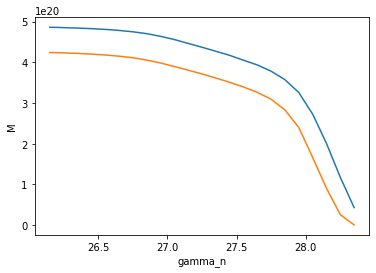

In [40]:
erai['M'].sel(select).mean('time').plot()
ecco['M'].sel(select).mean('time').plot()

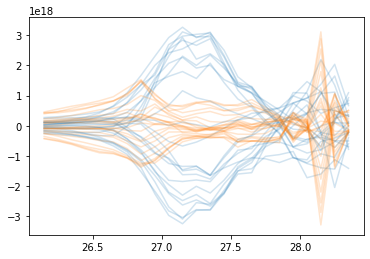

In [41]:
plt.plot(gs,_annualanom(erai['M'].sel(select)),color='tab:blue',alpha=0.2);
plt.plot(gs,_annualanom(ecco['M'].sel(select)),color='tab:orange',alpha=0.2);

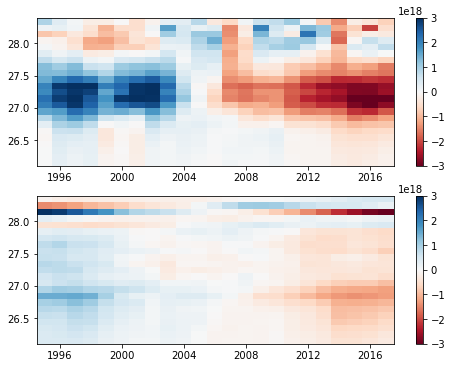

In [42]:
clims = [-3E18,3E18]
fig,ax = plt.subplots(figsize=(8,6),nrows=2)
im = ax[0].pcolormesh(years,gs,
                      _annualanom(erai['M'].sel(select)),
                      vmin = clims[0],vmax = clims[1], cmap='RdBu')
plt.colorbar(im,ax=ax[0])
im = ax[1].pcolormesh(years,gs,
                      _annualanom(ecco['M'].sel(select)),
                      vmin = clims[0],vmax = clims[1], cmap='RdBu')
plt.colorbar(im,ax=ax[1])

- quite clearly, Ivana's dMdt is not the same as mine
- when I look at the total mass greater than the ispycnal, then they look rather similar
- but if the summed tendency (Ivana's calculation) is balanced, then the calculation as I have it will not be
- what, then, is Ivana's tendency term?